In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### 1.1.1---Implement K-means clustering algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images but not for clustering. Apply k-means to the provided image with K=2 and K=3. Display the resulting segmented images for 10 iterations in both cases. (10 points)

In [2]:
def K_Mean (dataset, k, center, label):
    ##get new list of labels of the pixels
    for i in range (dataset.shape[0]):
        min_D = np.inf
        minIndex = -1
        for j in range (k):
#             distance from the point to the mean of the cluster
            distance = np.sqrt(np.power((dataset[i][0] - center[j][0]), 2) 
                               + np.power((dataset[i][1] - center[j][1]), 2) 
                               + np.power((dataset[i][2] - center[j][2]), 2))
            if distance < min_D:
                min_D = distance 
                minIndex = j
        label[i] = minIndex
    
#     get new means form next iteration
    for x in range (k):
        sum_all = [0, 0, 0]
        num = 0
        for y in range (dataset.shape[0]):
            if label[y] == x :
                sum_all = [(sum_all[0] + dataset[y][0]), 
                           (sum_all[1] + dataset[y][1]), 
                           (sum_all[2] + dataset[y][2])]
                num = num + 1
        center[x] = [sum_all[0]/num, sum_all[1]/num, sum_all[2]/num] 
        
    return center, label


### K-Means: K=2

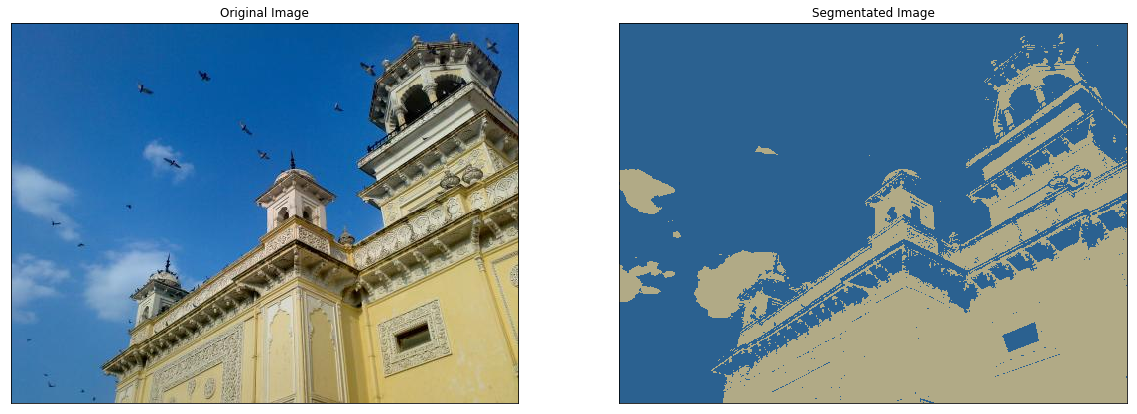

In [3]:
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)
dataset = img.reshape(img.shape[0]*img.shape[1], 3)
k=2

# create label for the data points to group them into two clusters
label = []
for i in range (int(dataset.shape[0]/k)):
    label.append(0)
for j in range (int(dataset.shape[0]/k), dataset.shape[0], 1):
    label.append(1)

# calculate the mean of the clusters
center = []
for x in range (k):
    number = 0
    sum_sub = [0, 0, 0]
    for y in range (dataset.shape[0]):
        if label[y] == x :
            sum_sub = [(sum_sub[0] + dataset[y][0]), 
                       (sum_sub[1] + dataset[y][1]), 
                       (sum_sub[1] + dataset[y][1])]
            number = number + 1
    center.append([sum_sub[0]/number, sum_sub[1]/number, sum_sub[2]/number])  

# iterate 10 times to perform the segmentation
for n in range(10):
    center, label = K_Mean(dataset, k, center, label)

# display the images
center = np.uint8(center)
segmentation = center[label]
segmentation = segmentation.reshape((img.shape))

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(segmentation)
plt.title("Segmentated Image"), plt.xticks([]), plt.yticks([])
plt.show()

### K-Means: K=3

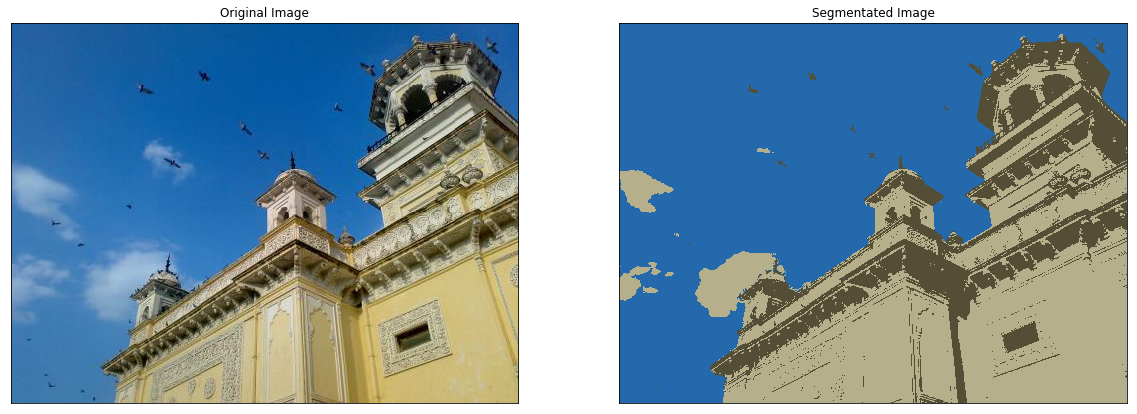

In [4]:
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)
dataset = img.reshape(img.shape[0]*img.shape[1], 3)

k = 3

# create label to group the data points into 3 clusters
label = []
for i in range (int(dataset.shape[0]/k)):
    label.append(0)
for j in range (int(dataset.shape[0]/k), int(dataset.shape[0]/k)* 2, 1):
    label.append(1)
for m in range (int(dataset.shape[0]/k)* 2, dataset.shape[0], 1):
    label.append(2)
    
# calculate the mean of the clusters
center = []
for x in range (k):
    number = 0
    sum_sub = [0, 0, 0]
    for y in range (dataset.shape[0]):
        if label[y] == x :
            sum_sub = [(sum_sub[0] + dataset[y][0]), 
                       (sum_sub[1] + dataset[y][1]), 
                       (sum_sub[1] + dataset[y][1])]
            number = number + 1
    center.append([sum_sub[0]/number, sum_sub[1]/number, sum_sub[2]/number])  

# iterate 10 times to perform the segmentation
for n in range(10):
    center, label = K_Mean(dataset, k, center, label)

# display the images
center = np.uint8(center)
segmentation = center[label]
segmentation = segmentation.reshape((img.shape))

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(segmentation)
plt.title("Segmentated Image"), plt.xticks([]), plt.yticks([])
plt.show()

#### 1.1.2---Implement the EM algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images. Apply it to the given image with 2 and 3 Gaussian components. Display the resulting segmented images for 10 iterations in both cases. (20 points)

In [5]:
def normal_Distribution(x, mean, covariance):
    std = np.sqrt(np.sqrt(np.power(covariance[0], 2) + 
                          np.power(covariance[1], 2) + 
                          np.power(covariance[2], 2)))
    var = np.power((x[0] - mean[0]), 2) + np.power((x[1] - mean[1]), 2) + np.power((x[2] - mean[2]), 2)
    probab = 1 / (np.sqrt(2 * np.pi) * std) * np.exp(- var / (2 * np.power(std, 2)))
    return probab

def EM (dataset, k, theta, label):
    probability = []
    for i in range (0, dataset.shape[0], 1):
        probability_max = 0
        index_max = -1
        accumulate = 0
        for j in range (k):
            prob =  theta[3*k+j] * normal_Distribution(dataset[i], theta[k+j], theta[2*k+j])
            if prob > probability_max: 
                probability_max = prob
                index_max = j
        for m in range (k):
            accumulate = accumulate + theta[3*k+m]*normal_Distribution(dataset[i], theta[k+m], theta[2*k+m])
        label[i] = index_max
        probability.append(probability_max/accumulate)
        
    ##renew theta
    for n in range (k):
        point = 0
        alpha = 0
        
        mean = [0, 0, 0]
        sigma = [0, 0, 0]
        for x in range (0, dataset.shape[0], 1):
            if label[x] == n:
                point = point + 1
                alpha = alpha + probability[x]
                
                mean = [(mean[0] + dataset[x][0] * probability[x]),
                        (mean[1] + dataset[x][1] * probability[x]),
                        (mean[2] + dataset[x][2] * probability[x]),]
                
                sigma = [(sigma[0] + probability[x] * np.power((dataset[x][0]-theta[k+n][0]), 2)),
                         (sigma[1] + probability[x] * np.power((dataset[x][1]-theta[k+n][1]), 2)),
                         (sigma[2] + probability[x] * np.power((dataset[x][2]-theta[k+n][2]), 2))]
       
        theta[n] = point
        theta[k+n]= [mean[0]/alpha, mean[1]/alpha, mean[2]/alpha]
        theta[2*k+n]= [sigma[0]/alpha, sigma[1]/alpha, sigma[2]/alpha]
        theta[3*k+n] = alpha / point
    return theta, label

### EM: K=2

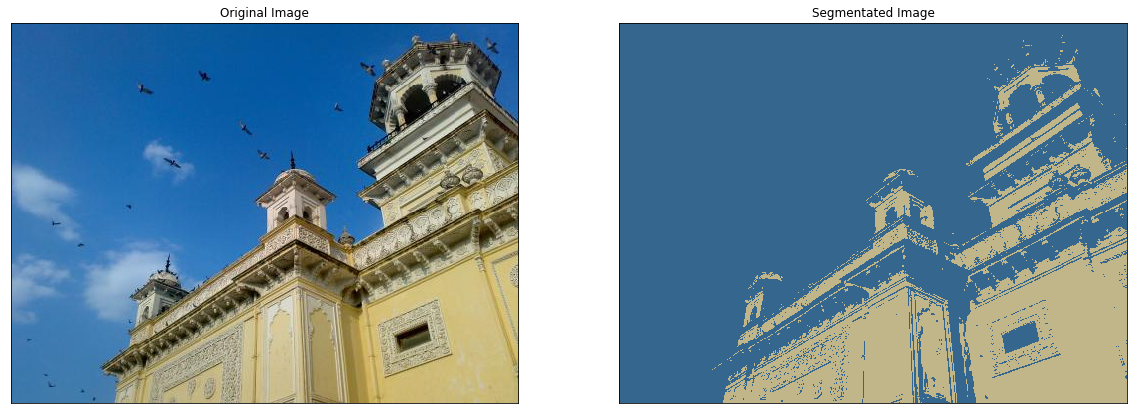

In [6]:
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)
dataset = img.reshape(img.shape[0]*img.shape[1], 3)

k=2

# create the label for all data points and divide them into 3 clusters
label = []
for i in range (int(dataset.shape[0]/2) - 1):
    label.append(0)
for j in range (int(dataset.shape[0]/2 - 1), dataset.shape[0], 1):
    label.append(1)

# create the data structure theta, which includes N, u, covariance,alpha
theta = []

# calculate N = number of pixels in the clusters
for i in range (k):
    point = 0
    for j in range (dataset.shape[0]):
        if label[j] == i:
            point = point + 1
    theta.append(point)

# calculate the mean of the clusters
for i in range (k):
    mean_sub = [0, 0, 0]
    for j in range (dataset.shape[0]):
        if label[j] == i:
            mean_sub = [(mean_sub[0] + dataset[j][0]), 
                        (mean_sub[1] + dataset[j][1]), 
                        (mean_sub[2] + dataset[j][2])]
    theta.append([(mean_sub[0] / theta[i]), (mean_sub[1] / theta[i]), (mean_sub[2] / theta[i])])
    
# calculate the covariance of the clusters
for i in range (k):
    sigma_sub = [0, 0, 0]
    for j in range (dataset.shape[0]):
        if label[j] == i:
            sigma_sub = [(sigma_sub[0] + np.power((dataset[j][0] - theta[k+i][0]), 2)),
                         (sigma_sub[1] + np.power((dataset[j][1] - theta[k+i][1]), 2)),
                         (sigma_sub[2] + np.power((dataset[j][2] - theta[k+i][2]), 2))]
    theta.append([(sigma_sub[0]/(theta[i]-1)), (sigma_sub[1]/(theta[i]-1)), (sigma_sub[2]/(theta[i]-1))])

# calculate the alpha(probability weight) of the clusters    
for i in range (k):
    prob = 0
    for j in range (dataset.shape[0]):       
        if label[j] == i:
            prob = prob + normal_Distribution(dataset[j], theta[k+i], theta[2*k+i])
    theta.append(prob / theta[i])

# iterate 10 times
for i in range(10):
    theta, label = EM(dataset, k, theta, label) 

# extract the mean    
centers = []
for j in range (k):
    centers.append(theta[k+j])
    
centers = np.uint8(centers)
segmentation = centers[label]
segmentation = segmentation.reshape((img.shape))

# display segmented images
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(segmentation)
plt.title("Segmentated Image"), plt.xticks([]), plt.yticks([])
plt.show()

### EM: K=3

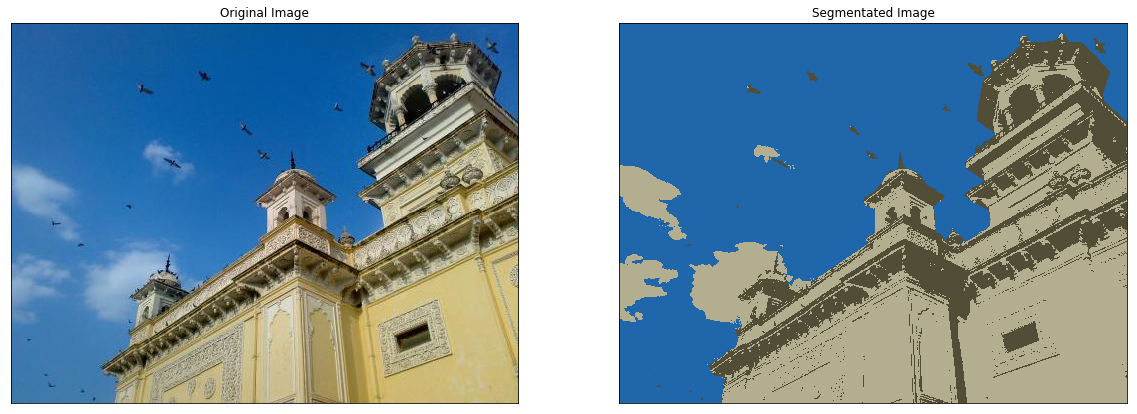

In [8]:
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)
dataset = img.reshape(img.shape[0]*img.shape[1], 3)

k = 3

# create the label for all data points and divide them into 3 clusters
label = []
for i in range (int(dataset.shape[0]/k)):
    label.append(0)
for j in range (int(dataset.shape[0]/k), int(dataset.shape[0]/k)*2, 1):
    label.append(1)
for m in range (int(dataset.shape[0]/k)*2, dataset.shape[0], 1):
    label.append(2)
    
# create the data structure theta, which includes N, u, covariance,alpha
theta = []
# calculate N = number of pixels in the clusters
for i in range (k):
    point = 0
    for j in range (dataset.shape[0]):
        if label[j] == i:
            point = point + 1
    theta.append(point)

# calculate the mean of the clusters
for i in range (k):
    mean_sub = [0, 0, 0]
    for j in range (dataset.shape[0]):
        if label[j] == i:
            mean_sub = [(mean_sub[0] + dataset[j][0]), 
                        (mean_sub[1] + dataset[j][1]), 
                        (mean_sub[2] + dataset[j][2])]
    theta.append([(mean_sub[0] / theta[i]), (mean_sub[1] / theta[i]), (mean_sub[2] / theta[i])])
    
# calculate the covariance of the clusters
for i in range (k):
    sigma_sub = [0, 0, 0]
    for j in range (dataset.shape[0]):
        if label[j] == i:
            sigma_sub = [(sigma_sub[0] + np.power((dataset[j][0] - theta[k+i][0]), 2)),
                         (sigma_sub[1] + np.power((dataset[j][1] - theta[k+i][1]), 2)),
                         (sigma_sub[2] + np.power((dataset[j][2] - theta[k+i][2]), 2))]
    theta.append([(sigma_sub[0]/(theta[i]-1)), (sigma_sub[1]/(theta[i]-1)), (sigma_sub[2]/(theta[i]-1))])

# calculate the alpha(probability weight) of the clusters
for i in range (k):
    prob = 0
    for j in range (dataset.shape[0]):       
        if label[j] == i:
            prob = prob + normal_Distribution(dataset[j], theta[k+i], theta[2*k+i])
    theta.append(prob / theta[i])

# iterate 10 times
for i in range(10):
    theta, label = EM(dataset, k, theta, label) 

# extract the mean
centers = []
for j in range (k):
    centers.append(theta[k+j])
    
# display segmented images
centers = np.uint8(centers)
segmentation = centers[label]
segmentation = segmentation.reshape((img.shape))

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(segmentation)
plt.title("Segmentated Image"), plt.xticks([]), plt.yticks([])
plt.show()

### Reasoning Question

When the data has uniform distribution between the clusters, EM and K-Means are likely to give very close results. This is because if the data distribution is uniform, the mean of the clusters for both EM and K-Means are very similar and the standard deviation is relatively small. As a result, the both methods can clearly distinguish where to place each data point. Another situation where the results might be similar is that all the data points in all clusters are distributed very close to each other. In this way, the mean for both EM and K-Means would be very similar and the standard deviation will be very small. Hence, the end results would be similar.